In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv("train.csv")

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Basic questions
1. Who were the passenger on the Titanic
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passangers come from?
4. Who was alone and who was with family?

### Real question
5. What factors helped someone survive the accident?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

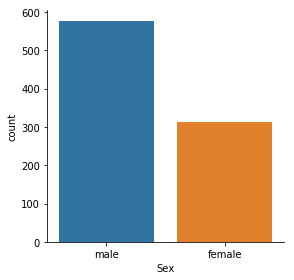

In [16]:
sns.factorplot(data=titanic_df, 
               x="Sex",
               kind="count")

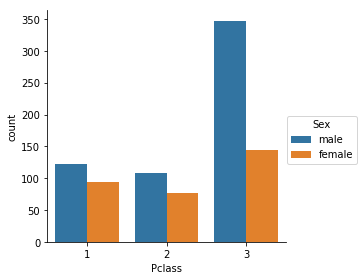

In [19]:
sns.factorplot(data=titanic_df,
               x="Pclass",
               hue="Sex",
               kind="count")

In [20]:
def male_female_child(passanger):
    age,sex = passanger
    if age < 16:
        return "child"
    else:
        return sex

In [21]:
titanic_df["person"] = titanic_df[["Age","Sex"]].apply(male_female_child,axis=1)

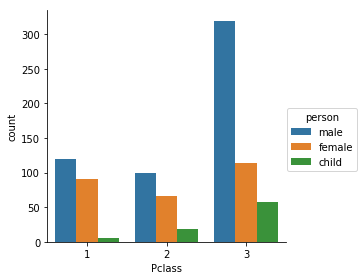

In [25]:
sns.factorplot(data=titanic_df,
               x="Pclass",
               hue="person",
               kind="count")

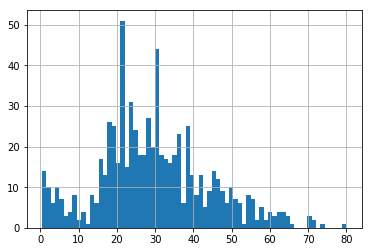

In [26]:
titanic_df["Age"].hist(bins=70)

In [27]:
titanic_df["Age"].mean()

29.69911764705882

In [29]:
titanic_df["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

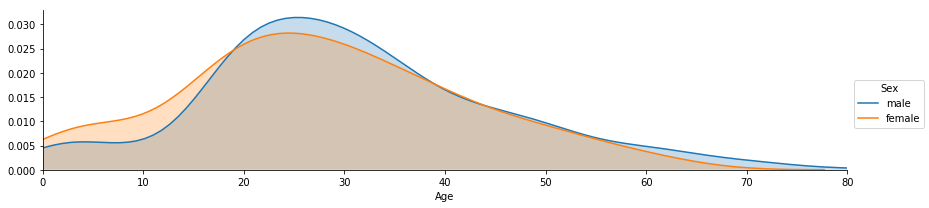

In [31]:
fig = sns.FacetGrid(titanic_df,
                    hue="Sex",
                    aspect=4)

fig.map(sns.kdeplot,"Age",shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

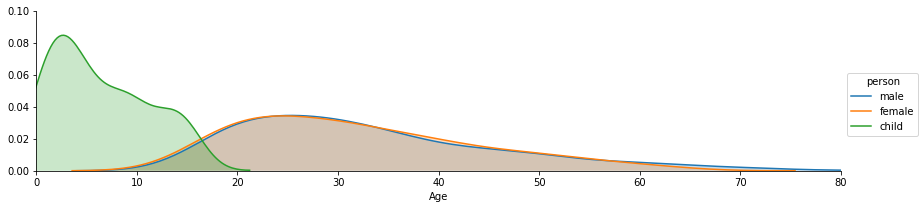

In [37]:
fig = sns.FacetGrid(titanic_df,
                    hue="person",
                    aspect=4)

fig.map(sns.kdeplot,"Age",shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.set(ylim=(0,0.1))
fig.add_legend()

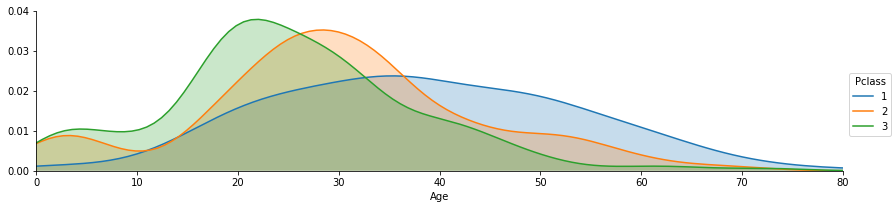

In [42]:
fig = sns.FacetGrid(titanic_df,
                    hue="Pclass",
                    aspect=4)

fig.map(sns.kdeplot,"Age",shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.set(ylim=(0,0.04))
fig.add_legend()

In [45]:
deck = titanic_df["Cabin"].dropna()

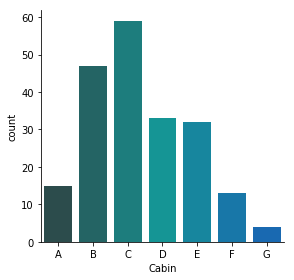

In [74]:
levels = []
for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ["Cabin"]
cabin_df = cabin_df[cabin_df.Cabin != "T"]

sns.factorplot(data=cabin_df, 
               x="Cabin",
               kind="count",
               palette="winter_d",
               order=list("ABCDEFG"))

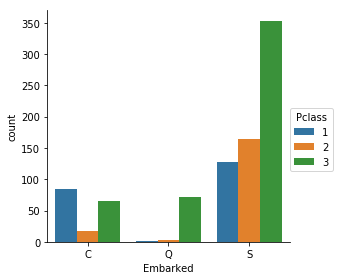

In [80]:
sns.factorplot(data=titanic_df, 
               x="Embarked",
               hue="Pclass",
               kind="count",
               order=["C","Q","S"])